Total Cross Section: nan pb


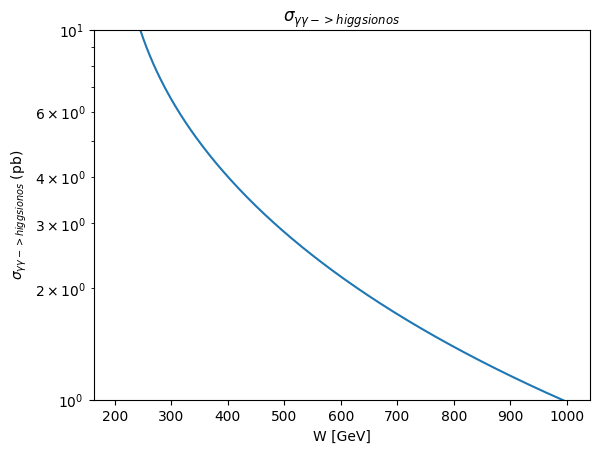

In [12]:
import numpy as np

import matplotlib.pyplot as plt

import math

from scipy.integrate import trapz


# Generate x values from 0 to 2*pi
wvalue = np.linspace(100, 1000, 300)


##################################################################


def cs_higgsionos_w_condition_Hamzeh(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0  
    me = 0.510998950e-3
    mhiggsionos = 100.0
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mhiggsionos * mhiggsionos / wvalue**2.0 >= 0, 1.0 - 4.0 * mhiggsionos * mhiggsionos / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > mhiggsionos, (4.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * (beta) * \
             ( (3.0 - (beta**4.0))/(2.0 * beta) * np.log((1.0+beta)/(1.0-beta)) - 2.0 + beta**2.0), 0.) * 1e9

    return cs


##################################################################


def cs_tautau_w(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 100.0
    G = 4.2e-3
    Gyy = (2.27e-3)*(4.2e-3)
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    cs = 4.0 * np.pi * hbarc2 * alpha2 / wvalue / wvalue \
         * ((1.0 + 4.0*mtau*mtau/wvalue/wvalue)*np.log(wvalue * wvalue / mtau / mtau) - 1.0 - 2.0*mtau*mtau/wvalue/wvalue) * 1e9

    return cs


##################################################################


def cs_higgsionos_w_condition(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0  
    me = 0.510998950e-3
    mhiggsionos = 100.0
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mhiggsionos * mhiggsionos / wvalue**2.0 >= 0, 1.0 - 4.0 * mhiggsionos * mhiggsionos / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > mhiggsionos, (4.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 *
               ( (1.0 + 4.0*mhiggsionos**2.0/wvalue**2.0 - 8.0*mhiggsionos**4.0/wvalue**4.0) * np.log((1.0+beta)/(1.0-beta)) - beta* (1.0 + 4.0*mhiggsionos**2.0/wvalue**2.0)), 0.) * 1e9

    return cs


##################################################################


def cs_higgsionos_w_condition_Krzysztof(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mhiggsionos = 100.0
    hbarc2 = 0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mhiggsionos * mhiggsionos / wvalue**2.0 >= 0, 1.0 - 4.0 * mhiggsionos * mhiggsionos / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs =  4.0 * np.pi * hbarc2 * alpha2 / wvalue**2.0 * \
         (2.0 * (1.0 + 4.0 * mhiggsionos**2.0 / wvalue**2.0 - 8.0 * mhiggsionos**4.0 / wvalue**4.0) * np.log(2.0 * wvalue / (mhiggsionos * (1.0 + beta))) - 
          beta * (1.0 + 4.0 * mhiggsionos**2.0 / wvalue**2.0)) * 1e9

    return cs


##################################################################


# Calculate y values using cs_DM_w function

#y = cs_higgsionos_w_condition(wvalue)
#y = cs_tautau_w(wvalue)
y = cs_higgsionos_w_condition_Krzysztof(wvalue)


# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(wvalue, y)

ax.set_yscale("log")

ax.set_ylim(1.e0, 1.e1)  # Fix the typo here

# Customize the plot
ax.set_xlabel('W [GeV]')
ax.set_ylabel('$\sigma_{\gamma \gamma -> higgsionos}$ (pb)')
ax.set_title('$\sigma_{\gamma \gamma ->  higgsionos}$')


# Calculate the total cross section using the trapezoidal rule
total_cross_section = trapz(y, wvalue)

# Print the total cross section
print("Total Cross Section:", total_cross_section, "pb")


# Save the plot as a PDF file
plt.savefig('cs_higgsionos_w_plot.pdf')
plt.savefig('cs_higgsionos_w_plot.jpg') 



# Save y values as a function of wvalue in a text file
data = np.column_stack((wvalue, y))
np.savetxt('cs_higgsionos_w_values.txt', data, header='W_Value Y_Value', fmt='%0.8e', delimiter='\t')

# Show the plot
plt.show()


